# Logistic Regression Model
## Mini-Projet 3 : Classification des zones urbaines selon leur densité
### Réalisé par : Khadija Er-rakho
## Objectif

L'objectif est de classifier les zones urbaines en trois catégories :
- Faible densité
- Moyenne densité
- Élevée densité

Nous utilisons le modèle de Régression Logistique comme modèle baseline.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



## 2. Chargement des données


In [15]:
df = pd.read_csv("geo_urban_density_data_preprocessed.csv")
df.head()



,densite_population,densite_batiments,hauteur_moy_bat,distance_centre_km,taux_impermeabilisation,longitude,latitude,classe_urbaine,wifi_density_probe,classe_urbaine_encoded,target
0,0.453399,-0.698912,2.843182,-1.272241,-0.430125,-6.051183,34.894106,moyenne,-1.901630,1,1
1,-0.211900,0.245391,-0.813133,-0.649780,1.170118,-6.081844,34.830155,moyenne,0.001375,1,1
2,0.611582,0.682685,0.561947,-1.026238,0.140410,-6.132758,35.022266,moyenne,0.001375,1,1
3,1.528722,1.333833,0.145990,1.440636,-1.334519,-6.009676,35.016155,faible,0.001375,0,0
4,-0.312351,0.937712,0.371744,0.629681,0.189653,-5.934113,35.099108,faible,0.001375,0,0


## 3. Analyse exploratoire des données (EDA)
### Distribution des variables numériques


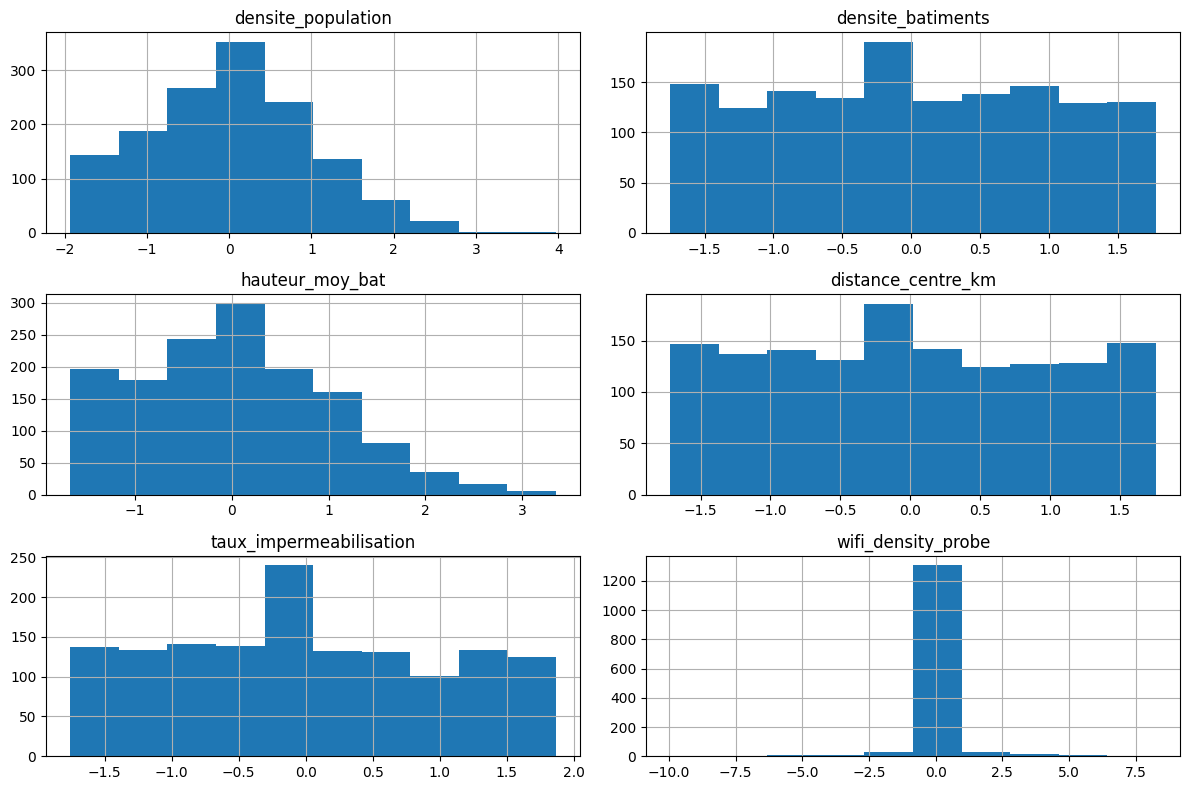

In [16]:
numeric_cols = [
    "densite_population",
    "densite_batiments",
    "hauteur_moy_bat",
    "distance_centre_km",
    "taux_impermeabilisation",
    "wifi_density_probe"
]

df[numeric_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()


### Distribution des classes urbaines


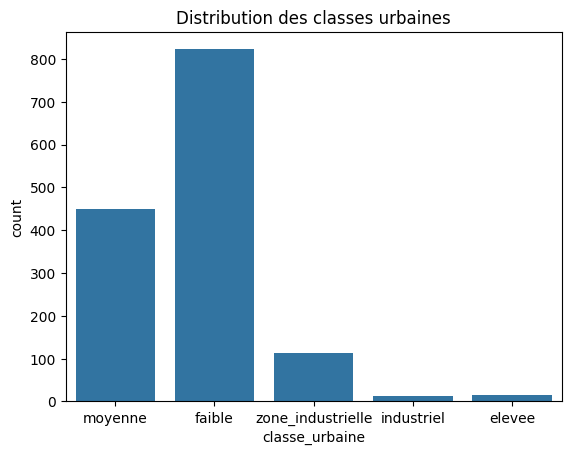

In [17]:
sns.countplot(x="classe_urbaine", data=df)
plt.title("Distribution des classes urbaines")
plt.show()



### Matrice de corrélation
Analyse des relations entre les variables numériques.

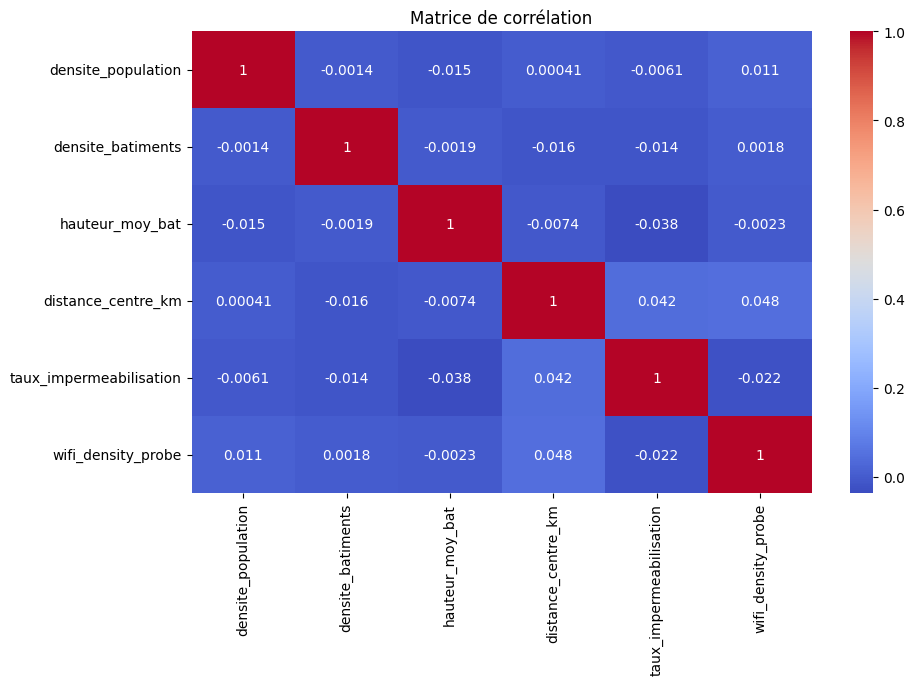

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

## 4. Préparation des données
Séparation des variables explicatives et de la variable cible.


In [19]:
X = df.drop(["target",
             "classe_urbaine",
             "classe_urbaine_encoded",
             "latitude",
             "longitude"], axis=1)

y = df["target"]
print(X.shape)
print(y.shape)

(1411, 6)
(1411,)


## 5. Division des données en Train et Test


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1128, 6)
Test size: (283, 6)


## 6. Principe de la Régression Logistique
La régression logistique est un modèle linéaire utilisé pour la classification.
Elle estime la probabilité d’appartenance à une classe à l’aide d’une fonction logistique.

In [21]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## 7. Évaluation du modèle


In [22]:
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))


Accuracy : 0.8303886925795053

Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       161
           1       0.77      0.83      0.80        94
           2       0.00      0.00      0.00         2
           3       0.73      0.73      0.73        26

    accuracy                           0.83       283
   macro avg       0.60      0.60      0.60       283
weighted avg       0.83      0.83      0.83       283



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Matrice de confusion


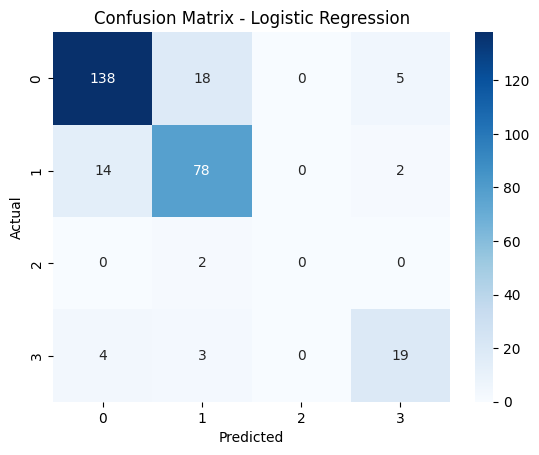

In [23]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coefficients.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
3,distance_centre_km,1.713693
2,hauteur_moy_bat,0.076730
1,densite_batiments,0.068556
5,wifi_density_probe,-0.086842
0,densite_population,-0.875877
4,taux_impermeabilisation,-1.047877


## Interprétation des Résultats

Le modèle de régression logistique donne des résultats satisfaisants.

L’accuracy montre que le modèle prédit correctement
la majorité des zones urbaines.

Le classification report indique que les scores de précision
et de rappel sont globalement équilibrés,
ce qui signifie que le modèle fonctionne bien
pour la plupart des classes.

La matrice de confusion montre que
la majorité des prédictions correctes
se trouvent sur la diagonale,
ce qui confirme la bonne performance du modèle.

On remarque également que les variables liées
à la densité urbaine ont une influence importante
dans la prédiction.

En général, le modèle est fiable
et peut être utilisé comme base
pour des modèles plus avancés.